In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pareto
%matplotlib inline

# Pareto distribution

В библиотеке scipy.stats есть такой вариант плотности распределения по Парето:


$$pareto.pdf(x, b) = b / x**(b+1)$$

Здесь $b$ -- параметр, который должен быть >2, чтобы было возможно посчитать дисперсию, также x>=1.
Для такого распределения математическое ожидание задается формулой:

$$\left( \frac{b}{b-1} \right)$$
а дисперсия следующей:

$$\left( \frac{1}{b-1} \right)^2 \frac{b}{b-2}$$

Посмотрим на выборку из 1000 элементов:

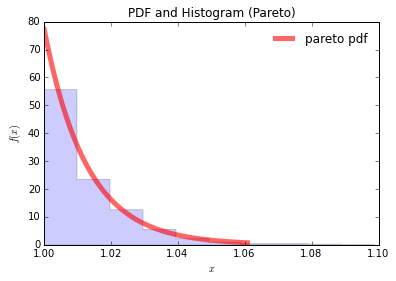

In [153]:
n = 1000
fig, ax = plt.subplots(1, 1)
b = 78 # just a parameter in pareto distribution
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b), 'r-', lw=5, alpha=0.6, label='pareto pdf')


# генерируем выборку:
r = pareto.rvs(b, size = n)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('PDF and Histogram (Pareto)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()
plt.show()

Теперь будем смотреть на распределения средних по выборкам размера n, количество которых есть 1000.

Сверху наложим график нормального распределения, соответствующего данному по ЦПТ.

In [159]:
def building_distribution(n, b):
    

    f, ax = plt.subplots(1,1)
    # здесь мы как раз делаем лист из средних по 1000 выборок размера n
    means = [np.mean(pareto.rvs(b, size = n)) for i in xrange(1, 1000)]
    ax.hist(means, histtype='stepfilled', alpha=0.2, normed = True)
    
    # then counting normal distribution parameters 
    #(equations from wiki):
    
    mean = b/(b-1.)
    var = (1/(b-1.))**2*(b/(b-2.))/n
    sigma = np.sqrt(var)
    
    #alternative method to get the same:
    #mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
    
    #drawing normal dis on the same plot:
    norm_rv = sts.norm(loc=mean, scale=sigma)
    x = np.linspace(0.2, 4, 1000)
    ax.plot(x, norm_rv.pdf(x), 'r-', lw=5, alpha=0.3, label='normal pdf')
    
    ax.legend(loc='best', frameon=False)
    plt.title("Normal PDF and Histogram(Pareto means),  n ="+str(n))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()
    plt.show()
    print  "mean:", mean, "var:", var

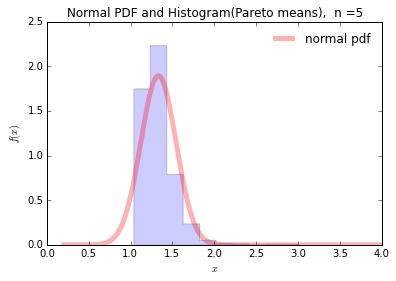

mean: 1.33333333333 var: 0.0444444444444


In [160]:
building_distribution(n=5,b=4)

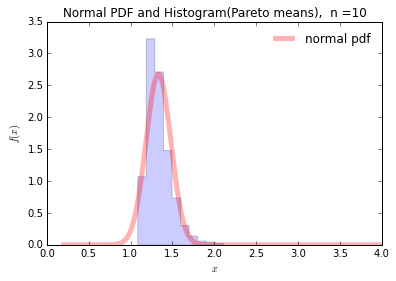

mean: 1.33333333333 var: 0.0222222222222


In [161]:
building_distribution(n=10,b=4)

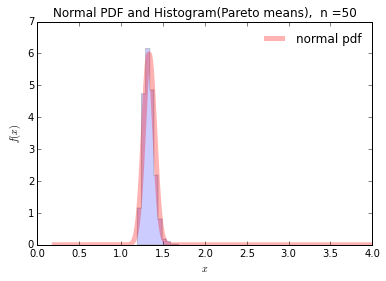

mean: 1.33333333333 var: 0.00444444444444


In [162]:
building_distribution(n=50,b=4)

____
# Выводы:

* С увеличением n распределение средних аппроксимируется соответствующим нормальным распределением лучше и лучше.
* С увеличением n распределение сужается, что связано с уменьшением дисперсии